In [1]:
import networkx  as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
G4 = nx.read_gpickle( '../../Files/Identifying_Subs/G4.pickle')

In [3]:
posts = pd.read_csv('/Users/jakobschlierf/Desktop/Master/Thesis/Files/Submissions/score/EDA_stats.csv')
posts.rename(columns={'Unnamed: 0':'subreddit', 'posts_pro':'anti', 'posts_neutral': "pro", 'posts_anti':'neutral'}, inplace=True)

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(320, 180)) 

nx.draw(G4, pos=nx.spring_layout(G4), node_color='r', edge_color='b', node_size=3, with_labels=True,)

In [5]:
posts['p_pr_ratio'] = posts['pro'] / posts['posts']

In [6]:
posts['p_an_ratio'] = posts['anti'] / posts['posts']
posts['p_ne_ratio'] = posts['neutral'] / posts['posts']

In [7]:
posts.head()

subreddit  posts   anti  neutral  pro  authors  p_pr_ratio  \
0        ABoringDystopia  54925  40645    13989  291    28033    0.005298   
1            AbruptChaos  41580  11787    29695   98    24983    0.002357   
2                 Africa  16022  10614     4455  953     4115    0.059481   
3  ActualPublicFreakouts  24961  12305    12323  333     9908    0.013341   
4                altnewz   3651   3002      522  127      169    0.034785   

   p_an_ratio  p_ne_ratio  
0    0.740009    0.254693  
1    0.283478    0.714165  
2    0.662464    0.278055  
3    0.492969    0.493690  
4    0.822240    0.142975

(array([225.,  33.,  13.,   6.,   5.,   1.,   3.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([0.        , 0.04651772, 0.09303544, 0.13955316, 0.18607088,
        0.2325886 , 0.27910632, 0.32562404, 0.37214176, 0.41865948,
        0.4651772 , 0.51169492, 0.55821264, 0.60473036, 0.65124808,
        0.6977658 , 0.74428352, 0.79080124, 0.83731896, 0.88383668,
        0.9303544 ]),
 <BarContainer object of 20 artists>)

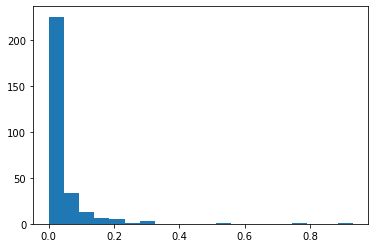

In [8]:
plt.hist(posts['p_pr_ratio'], bins = 20)

(array([10.,  1.,  3.,  5., 10.,  9., 16., 16., 15., 11., 15.,  8., 13.,
        17., 22., 25., 28., 30., 21., 14.]),
 array([0.05036708, 0.09539062, 0.14041417, 0.18543771, 0.23046126,
        0.2754848 , 0.32050835, 0.3655319 , 0.41055544, 0.45557899,
        0.50060253, 0.54562608, 0.59064962, 0.63567317, 0.68069672,
        0.72572026, 0.77074381, 0.81576735, 0.8607909 , 0.90581444,
        0.95083799]),
 <BarContainer object of 20 artists>)

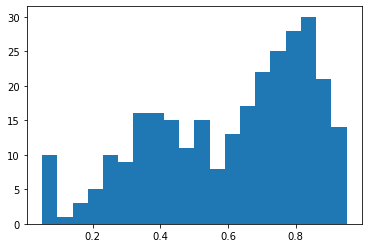

In [9]:
plt.hist(posts['p_an_ratio'], bins = 20)

(array([10., 29., 32., 29., 25., 23., 17., 12.,  9.,  8., 11., 12., 19.,
        17.,  9., 11.,  3.,  3.,  2.,  8.]),
 array([0.        , 0.04746109, 0.09492218, 0.14238327, 0.18984436,
        0.23730545, 0.28476654, 0.33222763, 0.37968872, 0.42714981,
        0.4746109 , 0.52207199, 0.56953308, 0.61699417, 0.66445526,
        0.71191635, 0.75937744, 0.80683853, 0.85429962, 0.90176071,
        0.9492218 ]),
 <BarContainer object of 20 artists>)

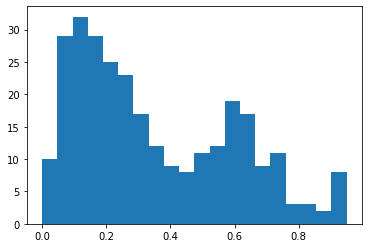

In [10]:
plt.hist(posts['p_ne_ratio'], bins = 20)

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(320, 180)) 

nx.draw(G4, pos=nx.spring_layout(G4), node_color='r', edge_color='b', node_size=3, with_labels=True,)

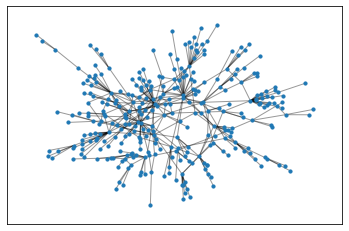

In [12]:
Gcc = G4.subgraph(sorted(nx.connected_components(G4), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, node_size=10)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

In [13]:
anti_dict = pd.Series(posts['p_an_ratio'].values, index=posts.subreddit).to_dict()

In [14]:
pro_dict = pd.Series(posts['p_pr_ratio'].values, index=posts.subreddit).to_dict()

In [15]:
neutr_dict = pd.Series(posts['p_ne_ratio'].values, index=posts.subreddit).to_dict()

In [16]:
nx.set_node_attributes(G4, anti_dict, 'anti_vac')

In [17]:
nx.set_node_attributes(G4, pro_dict, 'pro_vac')

In [18]:
nx.set_node_attributes(G4, neutr_dict, 'neutr_vac')

In [19]:
len(Gcc.nodes())

313

In [20]:
nodelist = list(G4.nodes())

In [21]:
for node in nodelist:
    if node not in anti_dict:
        G4.remove_node(node)

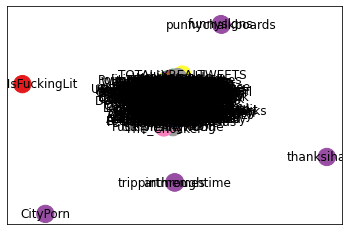

In [22]:
ATTRIBUTE_NAME = 'anti_vac'
COLOR_SCHEME = "Set1" # try plt.cm.Blues if your attribute is a continuous variable
colors = [G4.nodes[node][ATTRIBUTE_NAME] for node in list(G4.nodes())]
nx.draw_networkx(G4, node_color=colors, cmap=COLOR_SCHEME)

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [23]:
G4.is_directed()

False

Text(0.5, 1.0, 'Network of Subreddits with Color Coded by Percentage of Pro Vaccine Posts')

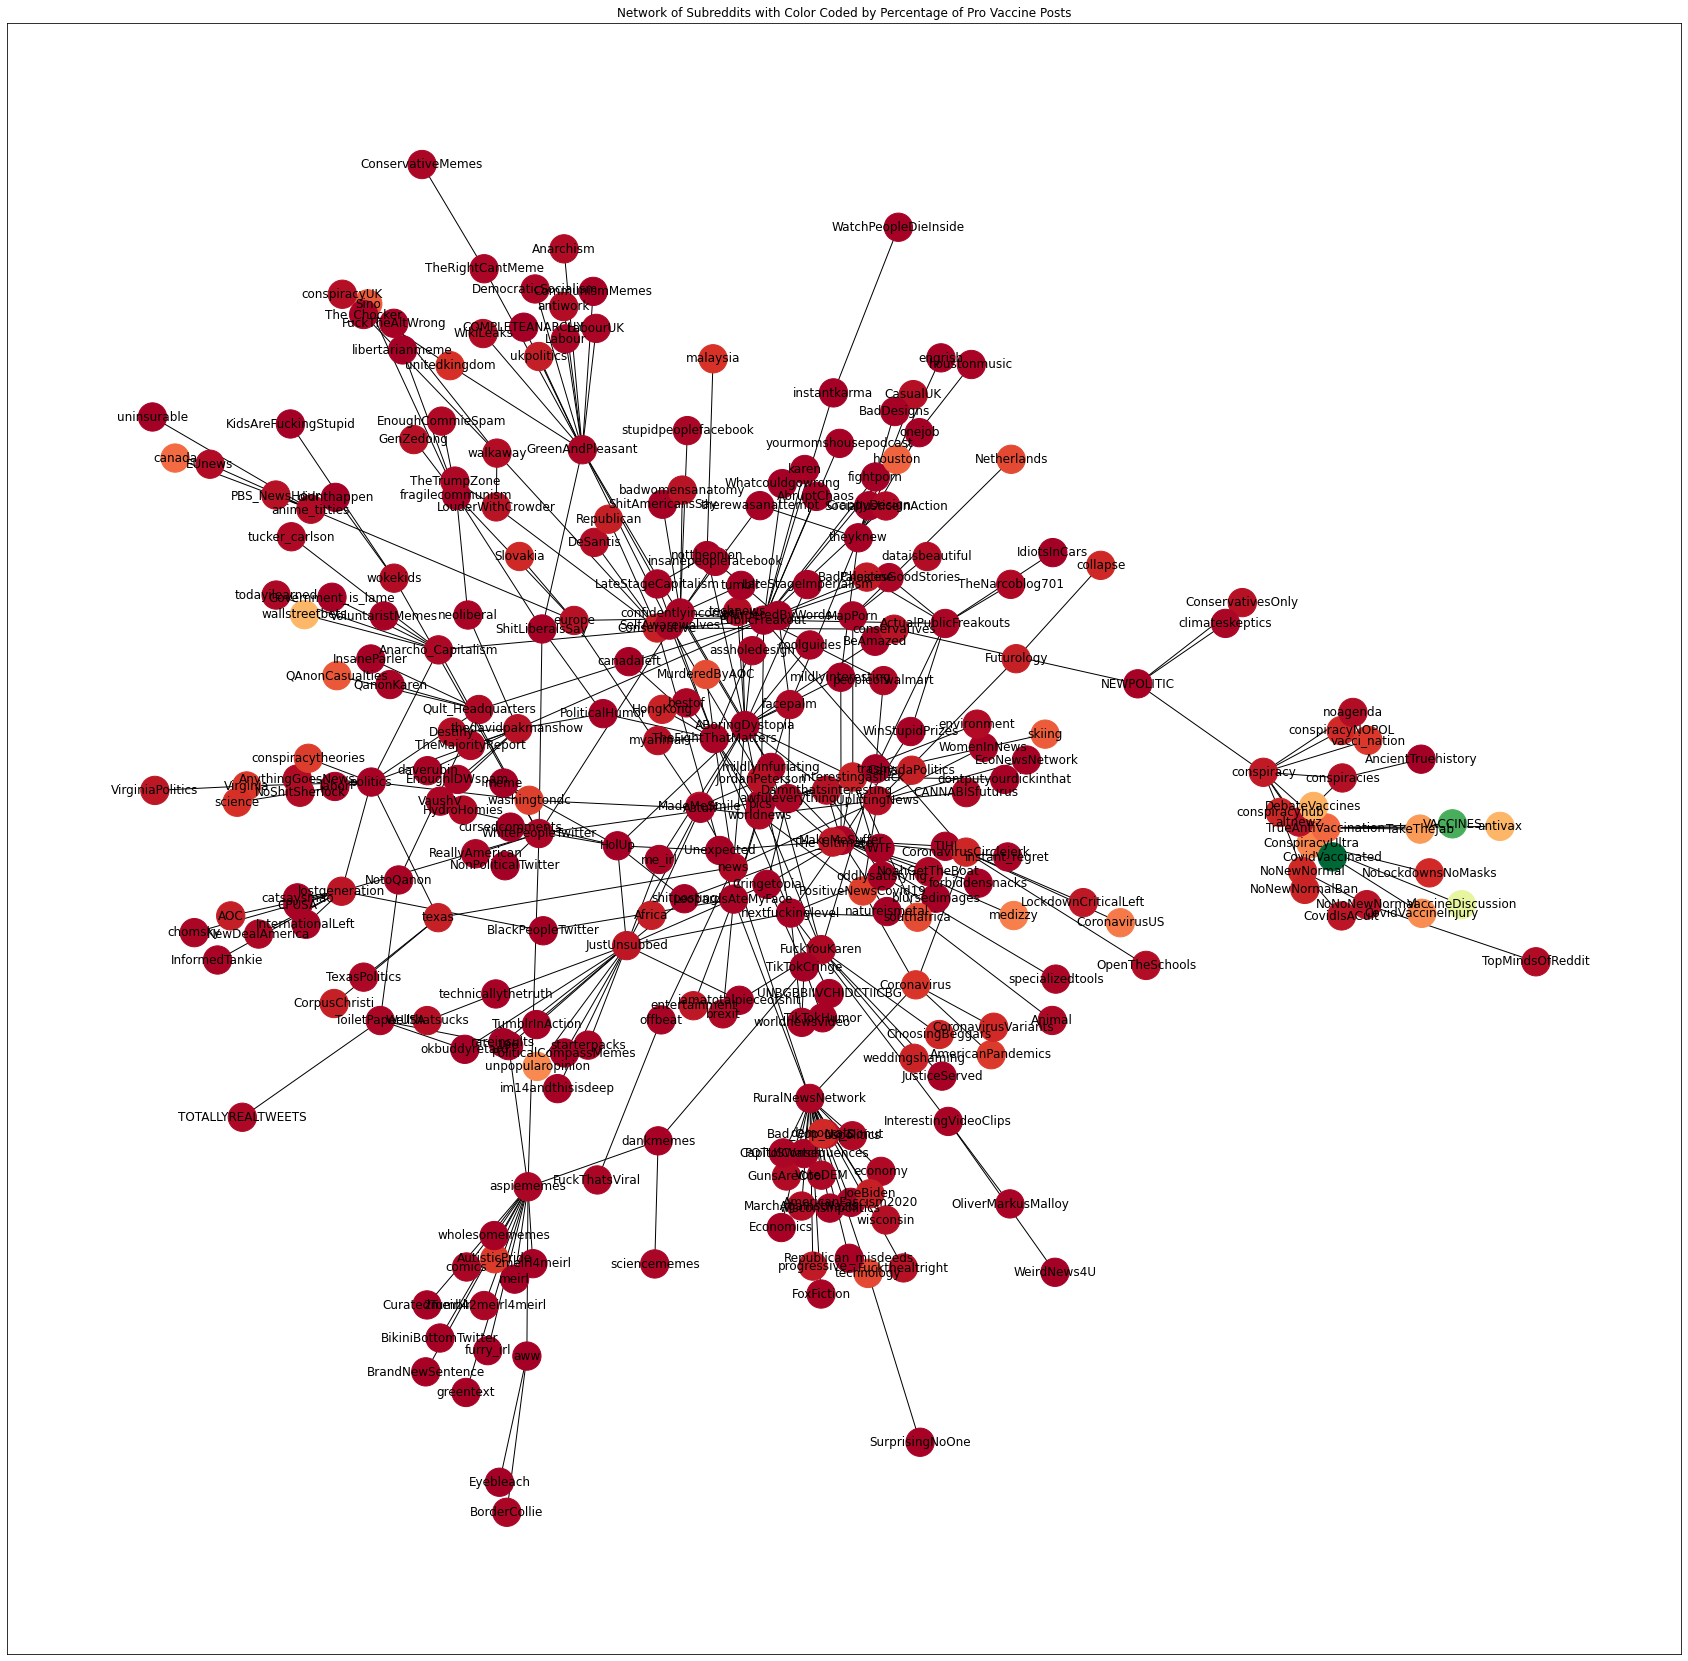

In [33]:
plt.figure(figsize=(30, 30))
ATTRIBUTE_NAME = 'pro_vac'
COLOR_SCHEME = "RdYlGn" # try plt.cm.Blues if your attribute is a continuous variable
Gcc = G4.subgraph(sorted(nx.connected_components(G4), key=len, reverse=True)[0])
colors = [Gcc.nodes[node][ATTRIBUTE_NAME] for node in list(Gcc.nodes())]
pos = nx.spring_layout(Gcc, seed=10396953)
# nx.draw_networkx_nodes(Gcc, pos, node_size=10, node_color=colors, cmap=COLOR_SCHEME, label=Gcc.nodes())
# nx.draw_networkx_edges(Gcc, pos, alpha=0.4)
nx.draw_networkx(Gcc, pos, node_color=colors, node_size=800, cmap=COLOR_SCHEME)
ax=plt.gca()
PCM=ax.get_children()[0] # this index may vary
# plt.colorbar(PCM, ax=ax)
plt.title("Network of Subreddits with Color Coded by Percentage of Pro Vaccine Posts")